## 1. Data Preparation

### 1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

### 1.2 Import Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


### 1.3 Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
#Checking missing value
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

- Data memiliki 19 kolom dan 4250 baris
- Tidak ada missing values 
- Tipe data pada semua kolom sudah sesuai

In [6]:
#Checking duplicated value
df.duplicated().sum()

0

In [7]:
#Check unique value
for col in df.columns:
  print(f'-----{col}-----')
  print(df[col].unique(), '\n')

-----state-----
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND'] 

-----account_length-----
[107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 176 156  37  27 134 243  42

In [8]:
for col in df.columns:
  print(f'Value counts of -- {col}-- column')
  print(df[col].value_counts(), '\n')

Value counts of -- state-- column
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64 

Value counts of -- account_length-- column
90     53
87     51
93     50
105    48
100    48
       ..
191     1
243     1
199     1
215     1
202     1
Name: account_length, Length: 215, dtype: int64 

Value counts of -- area_code-- column
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64 

Value counts of -- international_plan-- column
no     3854
yes     396
Name: internationa

In [9]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


## 2. Exploratory Data Analysis

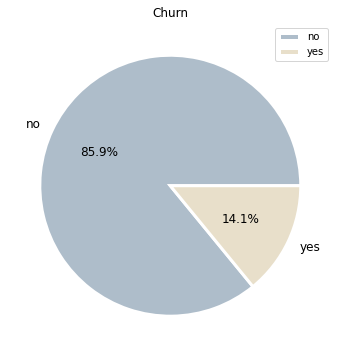

In [10]:
#Persentase penumpang yang churn dan tidak churn
colors = ['#AEBDCA', '#E8DFCA']

plt.figure(figsize=(10,6))
plt.pie(df['churn'].value_counts(),labels=df['churn'].value_counts().index,
       autopct='%1.1f%%',textprops={'fontsize':12}, colors = colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Churn')
plt.legend()

In [11]:
df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

- Dari total 4250, terdapat 85,9 % atau 3652 pelanggan tidak churn dan sebanyak 14,1 % atau 598 pelanggan memutuskan untuk churn 

### 2.1 Statistical Summary

#### a. Numerical Column

In [12]:
df_baru = df.copy()

In [13]:
df_baru.rename(columns = ({
    'state' : 'State',
    'account_length' : 'Account Lenght',
    'area_code' : 'Area Code',
    'international_plan' : 'International Plan',
    'voice_mail_plan' : 'Voice Mail Plan',
    'number_vmail_messages' : 'Number Vmail Messages',
    'total_day_minutes' : 'Total Day Minutes',
    'total_day_calls' : 'Total Day Calls',
    'total_day_charge' : 'Total Day Charge',
    'total_eve_minutes' : 'Total Eve Minutes',
    'total_eve_calls' : 'Total Eve Calls',
    'total_eve_charge' : 'Total Eve Charge',
    'total_night_minutes' : 'Total Night Minutes',
    'total_night_calls' : 'Total Night Calls',
    'total_night_charge' : 'Total Night Charge',
    'total_intl_minutes' : 'Total Intl Minutes',
    'total_intl_calls' : 'Total Intl Calls',
    'total_intl_charge' : 'Total Intl Charge',
    'number_customer_service_calls' : 'Number Customer Service Calls',
    'churn' : 'Churn'
}), inplace = True)

In [14]:
df_baru

,State,Account Lenght,Area Code,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Intl Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service Calls,Churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [15]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          4250 non-null   object 
 1   Account Lenght                 4250 non-null   int64  
 2   Area Code                      4250 non-null   object 
 3   International Plan             4250 non-null   object 
 4   Voice Mail Plan                4250 non-null   object 
 5   Number Vmail Messages          4250 non-null   int64  
 6   Total Day Minutes              4250 non-null   float64
 7   Total Day Calls                4250 non-null   int64  
 8   Total Day Charge               4250 non-null   float64
 9   Total Eve Minutes              4250 non-null   float64
 10  Total Eve Calls                4250 non-null   int64  
 11  Total Eve Charge               4250 non-null   float64
 12  Total Night Minutes            4250 non-null   f

In [16]:
#Mengelompokkan antara kolom numerik dan kategorik
numerical = ['Account Lenght', 'Number Vmail Messages', 'Total Day Minutes', 'Total Day Calls', 'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls', 'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls', 'Total Intl Charge', 'Number Customer Service Calls']
categorical = ['State', 'Area Code', 'International Plan', 'Voice Mail Plan', 'Churn']

In [17]:
df_baru[numerical].describe()

,Account Lenght,Number Vmail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Intl Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service Calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


1. Kolom `Account Lenght`, `Total Day Minutes`, `Total Day Calls`, `Total Day Charge`, `Total Eve Minutes`, `Total Eve Calls`, `Total Eve Charge`, `Total Night Minutes`, `Total Night Calls`, `Total Night Charge`, `Total Intl Minutes`, `Total Intl Calls`, `Total Intl Charge`, dan `Number Customer Service Calls` memiliki distribusi yang SIMETRIS karena perbedaan antara median dan mean tidak lebih dari 10-15%
2. kolom `Number Vmail Messages` memiliki distribusi yang TIDAK SIMETRIS karena perbedaan antara median dan mean jauh


#### b. Checking Distribution

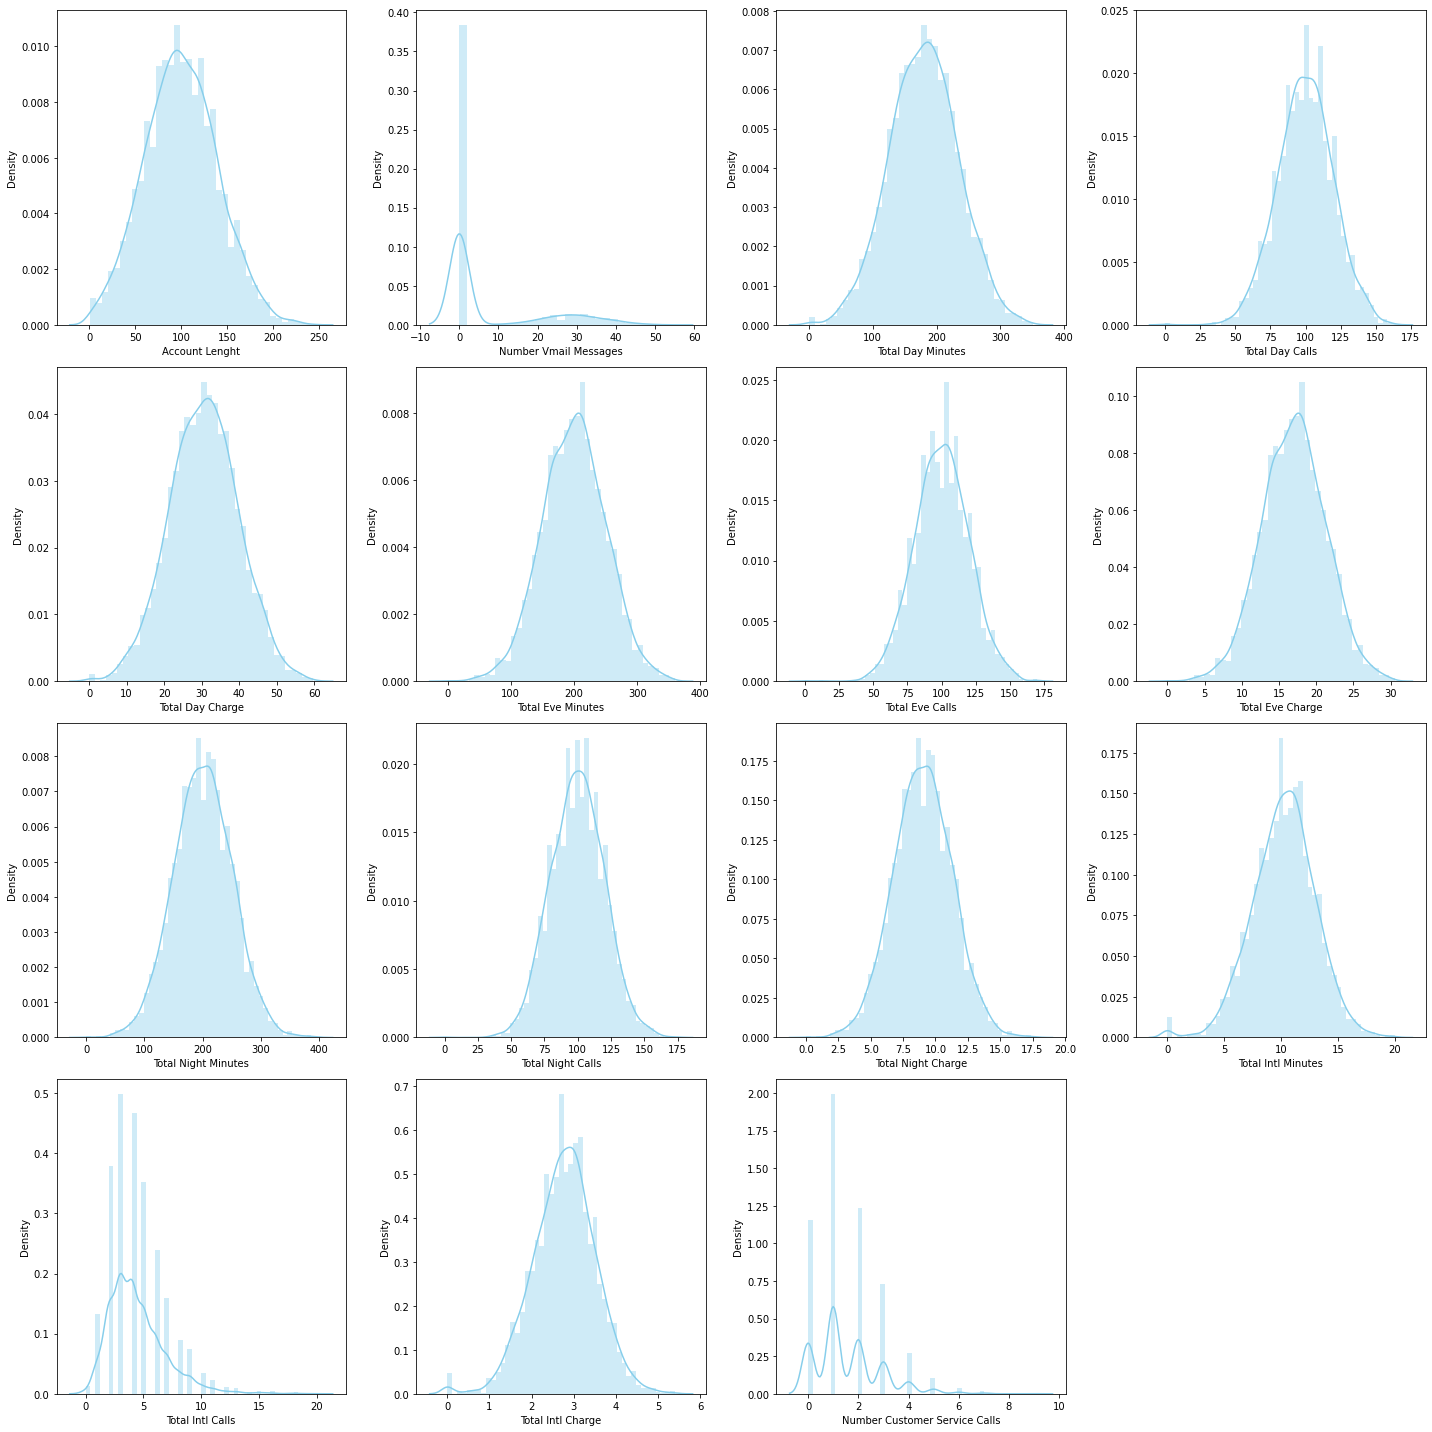

In [18]:
plt.figure(figsize=(20,20))

features = numerical
for i in range(0, len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_baru[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

1. Kebanyakan pelanggan menggunakan telco provider selama kurang lebih 100 bulan
2. Total lamanya panggilan yang dilakukan oleh kebanyakan pelanggan di US State adalah pada sore dan malam hari yaitu sekitar 220-220 menit dan untuk panggilan siang total lamanya kurang lebih 150-200 menit
3. Total panggilan yang paling sering dilakukan oleh kebanyakan pelanggan di US State adalah pada sore dan malam hari yaitu sekitar 90 - 115 per hari dan pada siang hari adalah sebanyak 85-110 perhari
4. Total biaya panggilan terbesar oleh kebanyakan pelanggan di US State adalah adalah pada pagi hari sebesar 28 - 32, sore hari sebesar 15-18 dan malam hari sebesar 8-10
5. Kebanyakan pelanggan di US State melakukan panggilan international dengan total lamanya kurang lebih selama 10 - 11 menit
6. Total panggilan malam yang kebanyakan pelanggan di US State lakukan adalah sebanyak 3 - 5 sehari
7. Total biaya panggilan sore per hari yang dilakukan oleh kebanyakan pelanggan di US State adalah sekitar 2 - 3
8. Pelanggan banyak melakukan panggilan layanan nomor 1


#### c. Categorical Column

In [19]:
df_baru[categorical].describe()

,State,Area Code,International Plan,Voice Mail Plan,Churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


1. State dan code area yang paling banyak menggunakan telco provider adalah WV dan area_code_415
2. Kebanyakan pelanggan tidak memiliki international plan dan voice mail plan
3. Kebanyakan pelanggan tidak churn dari telco provider

### 2.2 Univariate Analysis

#### a. Checking Outlier

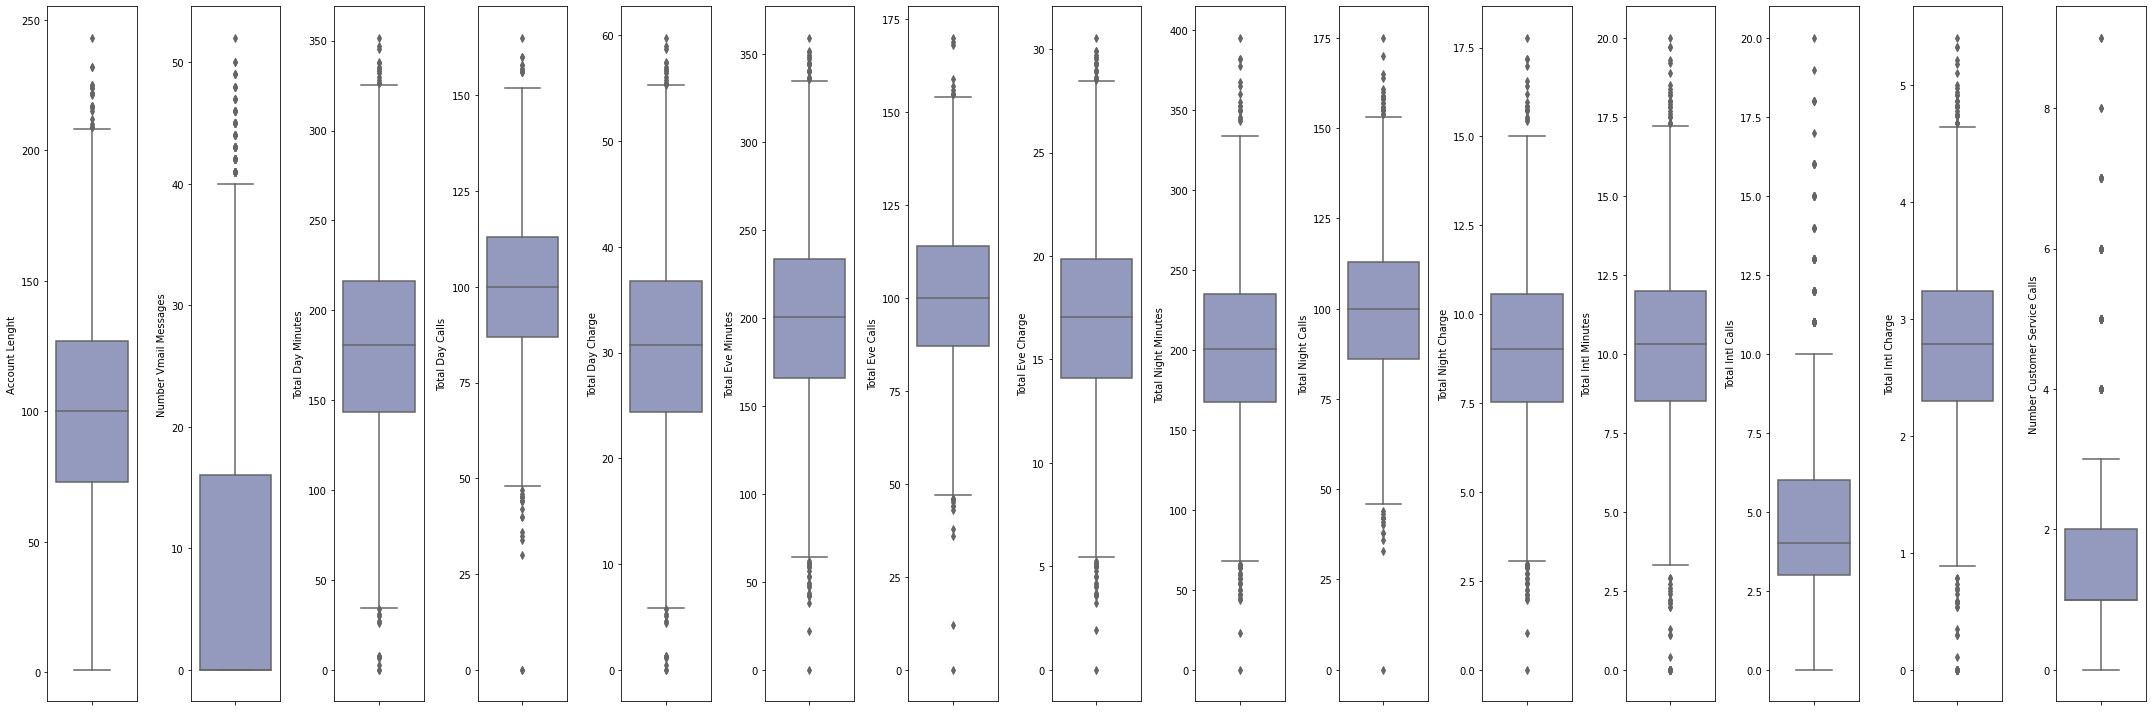

In [20]:
# Checking outlier using BOXPLOT
plt.figure(figsize=(30,10))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_baru[features[i]], palette = 'BuPu')
    plt.tight_layout()

- Data numerik banyak yang mengalami outlier, we will handle it later

In [21]:
#Check outlier lebih lanjut
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    new_column = []
    
    for x in data[column]:
        if x < q1 - 1.5 * iqr:
            new_column.append('outlier')
        elif x > q3 + 1.5 * iqr:
            new_column.append('outlier')
        else:
            new_column.append('not-outlier')
    
    return new_column

In [22]:
# Mengcopy dataset untuk menambahkan kolom outlier
df_baru1 = df_baru.copy()

In [23]:
df_baru1['outlier_Accountlenght'] = check_outlier(data=df_baru1, column='Account Lenght')
df_baru1['outlier_Numbervmail'] = check_outlier(data=df_baru1, column='Number Vmail Messages')
df_baru1['outlier_totaldayminute'] = check_outlier(data=df_baru1, column='Total Day Minutes')
df_baru1['outlier_totatdaycall'] = check_outlier(data=df_baru1, column='Total Day Calls')
df_baru1['outlier_totaldaycharge'] = check_outlier(data=df_baru1, column='Total Day Charge')
df_baru1['outlier_totaleveminute'] = check_outlier(data=df_baru1, column='Total Eve Minutes')
df_baru1['outlier_totalevecall'] = check_outlier(data=df_baru1, column='Total Eve Calls')
df_baru1['outlier_totatevecharge'] = check_outlier(data=df_baru1, column='Total Eve Charge')
df_baru1['outlier_totalnightminute'] = check_outlier(data=df_baru1, column='Total Night Minutes')
df_baru1['outlier_totalnightcall'] = check_outlier(data=df_baru1, column='Total Night Calls')
df_baru1['outlier_totatnightcharge'] = check_outlier(data=df_baru1, column='Total Night Charge')
df_baru1['outlier_totalintlminute'] = check_outlier(data=df_baru1, column='Total Intl Minutes')
df_baru1['outlier_totalintlcall'] = check_outlier(data=df_baru1, column='Total Intl Calls')
df_baru1['outlier_totatintlcharge'] = check_outlier(data=df_baru1, column='Total Intl Charge')
df_baru1['outlier_numbercs'] = check_outlier(data=df_baru1, column='Number Customer Service Calls')

In [24]:
outlier = ['outlier_Accountlenght','outlier_Numbervmail','outlier_totaldayminute','outlier_totatdaycall','outlier_totaldaycharge','outlier_totaleveminute','outlier_totalevecall','outlier_totatevecharge','outlier_totalnightminute','outlier_totalnightcall','outlier_totatnightcharge','outlier_totalintlminute','outlier_totalintlcall','outlier_totatintlcharge','outlier_numbercs']
for x in outlier:
  print(f'Value counts of -- {x}-- column')
  print(df_baru1[x].value_counts(), '\n')

Value counts of -- outlier_Accountlenght-- column
not-outlier    4230
outlier          20
Name: outlier_Accountlenght, dtype: int64 

Value counts of -- outlier_Numbervmail-- column
not-outlier    4164
outlier          86
Name: outlier_Numbervmail, dtype: int64 

Value counts of -- outlier_totaldayminute-- column
not-outlier    4225
outlier          25
Name: outlier_totaldayminute, dtype: int64 

Value counts of -- outlier_totatdaycall-- column
not-outlier    4222
outlier          28
Name: outlier_totatdaycall, dtype: int64 

Value counts of -- outlier_totaldaycharge-- column
not-outlier    4224
outlier          26
Name: outlier_totaldaycharge, dtype: int64 

Value counts of -- outlier_totaleveminute-- column
not-outlier    4216
outlier          34
Name: outlier_totaleveminute, dtype: int64 

Value counts of -- outlier_totalevecall-- column
not-outlier    4226
outlier          24
Name: outlier_totalevecall, dtype: int64 

Value counts of -- outlier_totatevecharge-- column
not-outlier  

#### b. Checking Imbalance Data

Text(0.5, 1.0, 'Churn Level')

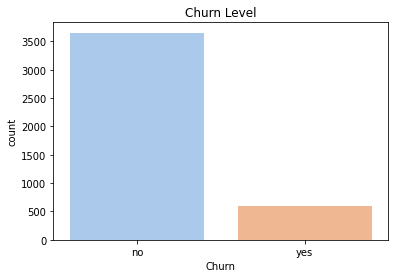

In [25]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_baru,
            x='Churn', palette ='pastel')
ax.set_title('Churn Level')

- Pada kolom `Churn` dapat dilihat bahwa terjadi imbalance data

### 2.3 Multivariate Analysis

#### a. Heatmap Correlation

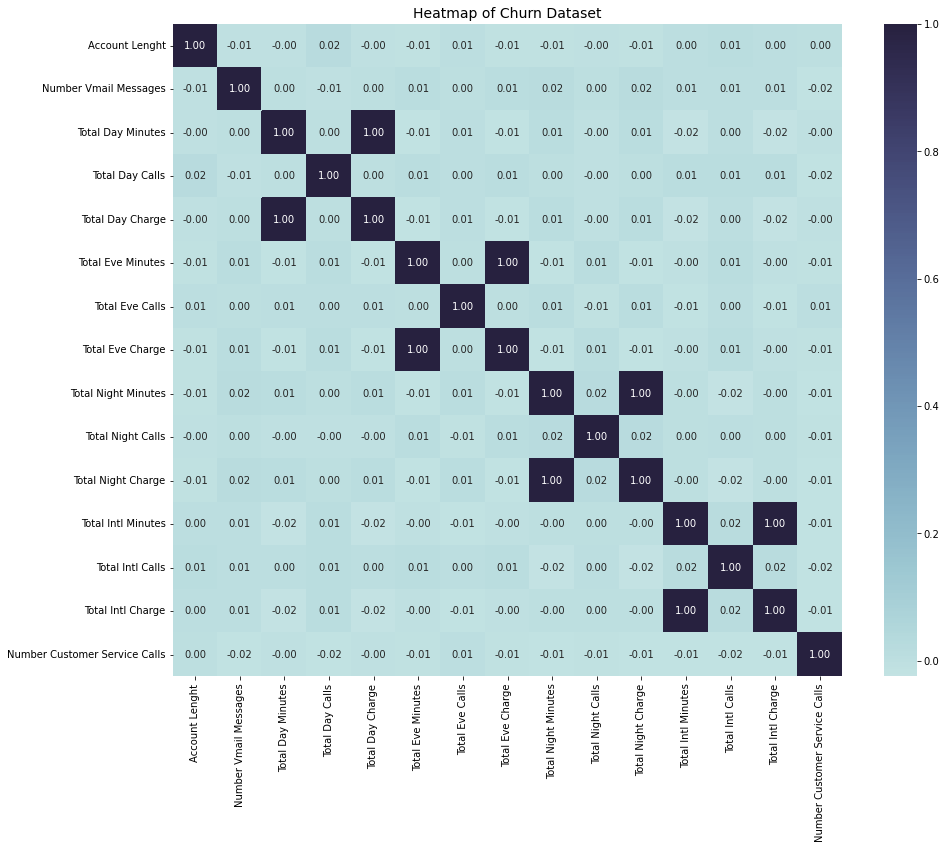

In [26]:
correlation = df_baru.corr()
plt.figure(figsize=(15, 12))
colormap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = colormap)
plt.title('Heatmap of Churn Dataset', fontsize=14)
plt.show()

- Minutes dan Charge memiliki nilai yang berkorelasi dikarenakan semakin tinggi menit telepon yang dilakukan maka semakin tinggi pula chargenya
- Kali ini akan didrop untuk Total day minutes, total eve minutes, total night minutes, dan total intl minutes

### 2.4 Categorical Analysis

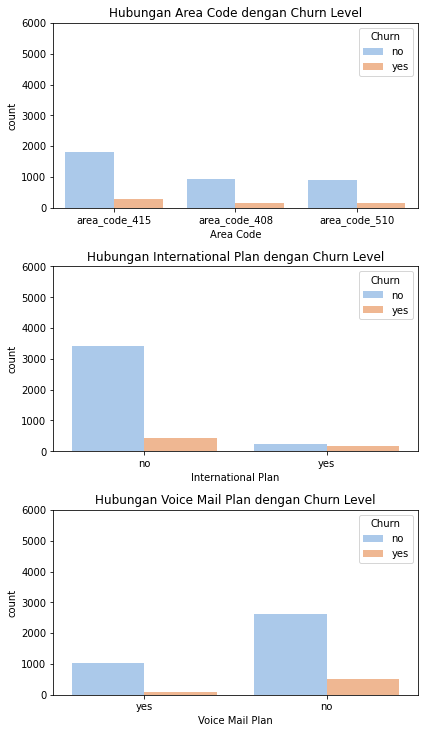

In [27]:
categorical1 = ['Area Code', 'International Plan', 'Voice Mail Plan']
plt.figure(figsize=(6,20))
features = categorical1

for i in range(0, len(features)):
    plt.subplot(6, len(features)//6 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x = df_baru[features[i]] , hue='Churn', data=df_baru, palette = 'pastel')
    plt.title(f'Hubungan {features[i]} dengan Churn Level',fontsize=12)
    plt.ylim(0,6000)
    plt.tight_layout()

1. Pelanggan yang memilih churn banyak berasal dari area_code_415 dan tidak memiliki international plan dan voice mall plan
2. Overall, pelanggan yang juga berasal dari area_code_415 dan tidak memiliki international plan dan voice mall plan banyak yang memutuskan untuk tidak churn

### 2.5 Deep Dive Question

In [28]:
df_baru

,State,Account Lenght,Area Code,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Intl Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service Calls,Churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


#### 1. Apa saja 10 daerah tertinggi yang mempunyai total charge terbesar?

In [130]:
df_baru['Total Charge'] = df_baru['Total Day Charge'] + df_baru['Total Eve Charge'] + df_baru['Total Night Charge'] + df_baru['Total Intl Charge']

In [30]:
biggest_10 = (df_baru
            .groupby('State') 
            .agg(total_spend=('Total Charge','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

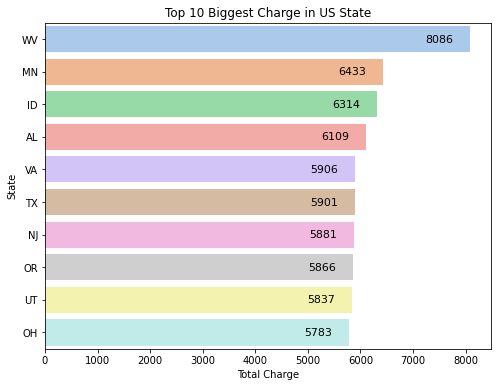

In [144]:
#Visualize it
plt.figure(figsize=(8,6))
biggest_10['State'] = biggest_10['State'].astype(str)
ax = sns.barplot(data=biggest_10, x='total_spend', y='State', palette= 'pastel')
plt.xticks(rotation=0)
plt.xlabel('Total Charge')
plt.title('Top 10 Biggest Charge in US State')
for p in ax.patches:
      number = '{}'.format(p.get_width().astype('int64'))
      ax.annotate(number, (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center',
      xytext=(-45,0), textcoords='offset points', color='black', fontsize=11)

- Berdasarkan grafik diatas state yang memiliki rerata total charge terbesar adalah state WV.

#### 2. Di US State, Area apa yang memiliki total charge tertinggi?

In [32]:
biggest_area = (df_baru
            .groupby('Area Code') 
            .agg(total_charge_area=('Total Charge','sum'))
            .reset_index()
            .sort_values('total_charge_area',ascending=False)
            .head(10)
            )

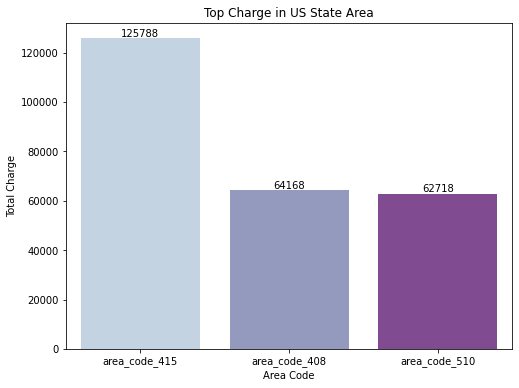

In [145]:
plt.figure(figsize=(8,6))
biggest_area['Area Code'] = biggest_area['Area Code'].astype(str)
ax = sns.barplot(data=biggest_area, x='Area Code', y='total_charge_area', palette = 'BuPu')
plt.xticks(rotation=0)
plt.ylabel('Total Charge')
plt.xlabel('Area Code')
plt.title('Top Charge in US State Area')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

- Kode area 415 memiliki total charge tertinggi karena memiliki pelanggan terbanyak pula

#### 3. Bagaimana hubungan antara churn level dengan lamanya pelanggan menggunakan telco provider?

In [34]:
df_baru['Churn'] = df_baru['Churn'].replace(['yes','no'],[1,0])

Text(0, 0.5, 'Churn Level(%)')

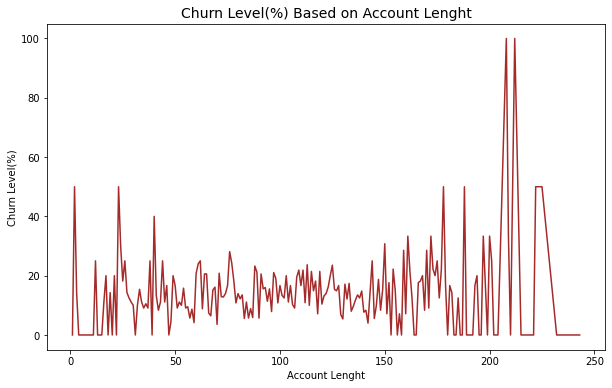

In [35]:
percentage = df_baru.groupby(['Account Lenght'])['Churn'].mean()*100
percentage.plot(kind='line',figsize=(10,6), color = 'brown')
plt.title('Churn Level(%) Based on Account Lenght',fontsize=14)
plt.ylabel('Churn Level(%)')

In [128]:
def bin_AccLenght(x):
    if x<51:
        return '0-50'
    elif x<101:
        return '51-100'
    elif x<151:
        return '101-150'
    elif x<201:
        return '151-200'
    else:
        return '>200'

df_baru['Account Lenght New'] = df_baru['Account Lenght'].apply(bin_AccLenght)

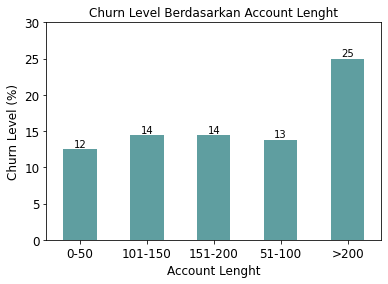

In [129]:
level1 = (df_baru.groupby('Account Lenght New')['Churn'].mean()*100)
ax = level1.plot(kind = 'bar', color = 'cadetblue', figsize=(6,4))
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Account Lenght', fontsize=12)
plt.ylabel('Churn Level (%)', fontsize=12)
plt.title('Churn Level Berdasarkan Account Lenght')
plt.ylim(0,30)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

- Semakin lama pelanggan menggunakan telco provider maka semakin tinggi level churnnya
- Berdasarkan grafik dapat dilihat bahwa pelanggan yang sudah menggunakan telco provider sekitar 200 - 215 bulan banyak yang memutuskan untuk churn
- Pelanggan dengan churn level terendah adalah yang menggunakan telco provider selama kurang lebih antara 50 -150 bulan

#### 4. Bagaimana hubungan antara churn level dengan total minutes, total charge, dan total call?

In [138]:
df_baru['Total Minutes'] = df_baru['Total Day Minutes'] + df_baru['Total Eve Minutes'] + df_baru['Total Night Minutes'] + df_baru['Total Intl Minutes']

In [131]:
def bin_TotalCharge(x):
    if x<21:
        return '0-20'
    elif x<41:
        return '20-40'
    elif x<61:
        return '40-60'
    elif x<81:
        return '60-80'
    else:
        return '>80'

df_baru['Total Charge Baru'] = df_baru['Total Charge'].apply(bin_TotalCharge)

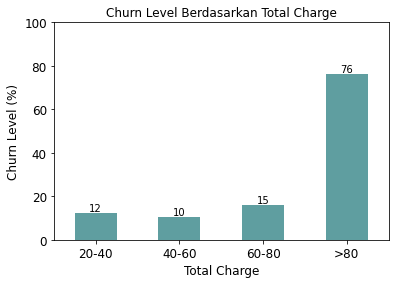

In [132]:
level2 = (df_baru.groupby('Total Charge Baru')['Churn'].mean()*100)
ax = level2.plot(kind = 'bar', color = 'cadetblue',figsize=(6,4))
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Total Charge', fontsize=12)
plt.ylabel('Churn Level (%)', fontsize=12)
plt.title('Churn Level Berdasarkan Total Charge')
plt.ylim(0,100)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

In [141]:
def bin_TotalMinutes(x):
    if x<301:
        return '200-300'
    elif x<401:
        return '301-400'
    elif x<501:
        return '401-500'
    elif x<601:
        return '501-600'
    elif x<701:
        return '601-700'
    elif x<801:
        return '701-800'   
    else:
        return '>800'

df_baru['Total Minutes new'] = df_baru['Total Minutes'].apply(bin_TotalMinutes)

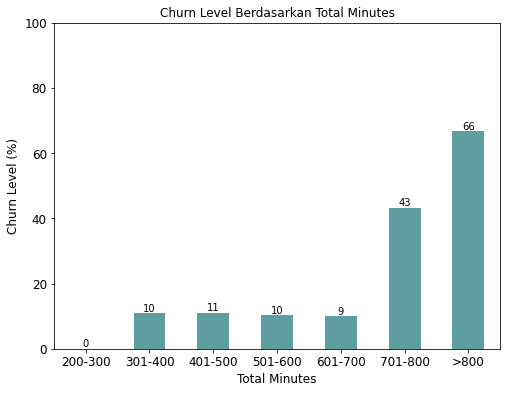

In [142]:
level4 = (df_baru.groupby('Total Minutes new')['Churn'].mean()*100)
ax = level4.plot(kind = 'bar', color = 'cadetblue',figsize=(8,6))
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)    
plt.xlabel('Total Minutes', fontsize=12)
plt.ylabel('Churn Level (%)', fontsize=12)
plt.title('Churn Level Berdasarkan Total Minutes')
plt.ylim(0,100)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

- Pelanggan yang memiliki total charge >80 memiliki churn level yang tinggi (cenderung churn)
- Pelanggan yang memaliki total minutes diatas 800 menit memiliki churn level yang tinggi (cenderung churn)

#### 5. Bagaimana hubungan antara area dengan number customer service call?

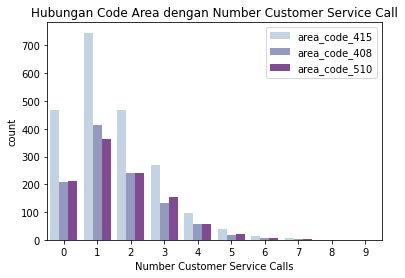

In [43]:
sns.countplot(x = df_baru['Number Customer Service Calls'] , hue='Area Code', data=df_baru, palette = 'BuPu')
plt.title('Hubungan Code Area dengan Number Customer Service Call')
plt.legend(loc = 'upper right')

- Kode area 415, 408, dan 510 banyak yang menghubungi layanan customer service sebanyak 0-3 kali dan dapat dikategorrikan performa company termasuk dalam kategori baik

#### 6. Kode Area apa yang memiliki total pesan vmail terbanyak?

In [44]:
vmail_area = (df_baru
            .groupby('Area Code') 
            .agg(total_vmail=('Number Vmail Messages','sum'))
            .reset_index()
            .sort_values('total_vmail', ascending = False)
            )

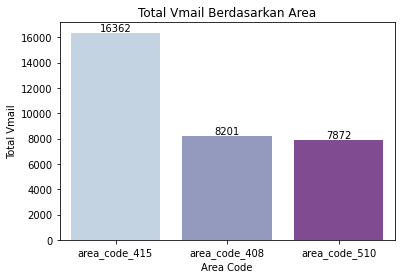

In [146]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=vmail_area, x='Area Code', y='total_vmail', palette = 'BuPu')
plt.xticks(rotation=0)
plt.ylabel('Total Vmail')
plt.xlabel('Area Code')
plt.title('Total Vmail Berdasarkan Area')
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

#### 7. Bagaimana hubungan antara kode area dengan voice mail plan dan international plan?

In [46]:
df_new = df_baru.copy()

In [47]:
df_new['Voice Mail Plan'] = df_new['Voice Mail Plan'].replace(['yes','no'],[1,0])
df_new['International Plan'] = df_new['International Plan'].replace(['yes','no'],[1,0])

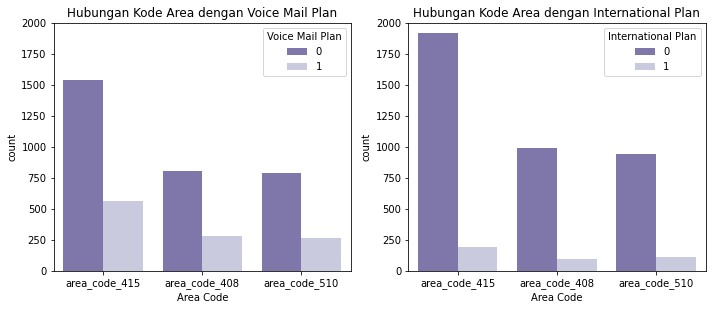

In [48]:
data5 = ['Voice Mail Plan', 'International Plan']
features = data5
plt.figure(figsize = (10,8))
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x = df_new['Area Code'] , hue=df_new[features[i]], data=df_new, palette = 'Purples_r')
    plt.title(f'Hubungan Kode Area dengan {features[i]}',fontsize=12)
    plt.ylim(0,2000)
    plt.tight_layout()

- Banyak pelanggan dari berbagai kode area memilih untuk tindak menggunakan voice mail plan dan international plan
- pelanggan dari kode area 415 memiliki jumlah terbanyak bagi pelanggan yang tidak menggunakan voice mail plan dan international plan
- Pelanggan yang memilih untuk menggunakan voice mail plan dan international yang terbanyak ada pada kode area 415
- Secara keseluruhan, pelanggan banyak yang memutuskan untuk tidak churn

#### 8. Bagaimana hubungan antara Churn dengan Charge, Minute, Calls?

In [49]:
def total_charge(i):
    b = (df_baru
           .groupby(i)
           .agg(Mean_DayCharge =('Total Day Charge','mean'),
               Mean_EveCharge=('Total Eve Charge','mean'),
               Mean_NightCharge=('Total Night Charge','mean'),
               Mean_IntlCharge=('Total Intl Charge','mean'))
           .reset_index()
          )
    return b

In [50]:
total_charge1 = total_charge('Churn')
total_charge1

,Churn,Mean_DayCharge,Mean_EveCharge,Mean_NightCharge,Mean_IntlCharge
0,0,29.844948,16.878743,8.981131,2.753018
1,1,35.528679,17.847207,9.285033,2.871254


Text(0, 0.5, 'Rerata Charge')

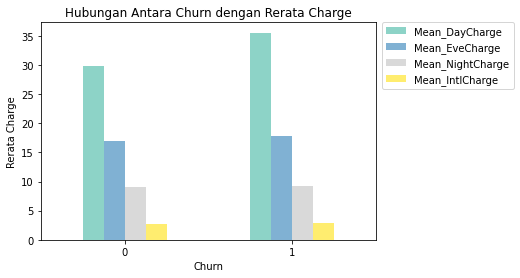

In [51]:
total_charge1.plot(x='Churn', y=['Mean_DayCharge','Mean_EveCharge','Mean_NightCharge','Mean_IntlCharge'], kind='bar', colormap='Set3')
plt.title(f'Hubungan Antara Churn dengan Rerata Charge',fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0)
plt.ylabel('Rerata Charge')

- Pelanggan yang memiliki rerata charge pada pagi, sore, malam, dan international tertinggi memiliki kecenderungan untuk churn. 
- Perbedaan paling signifikan adalah pada rerata charge pada pagi hari
- Rerata charge pada sore hari antara pelanggan yang cenderung churn dan tidak churn memiliki nilai yang hampir sama

In [52]:
def total_minutes(i):
    b = (df_baru
           .groupby(i)
           .agg(Mean_DayMinutes =('Total Day Minutes','mean'),
               Mean_EveMinutes=('Total Eve Minutes','mean'),
               Mean_NightMinutes=('Total Night Minutes','mean'),
               Mean_IntlMinutes=('Total Intl Minutes','mean'))
           .reset_index()
          )
    return b

In [53]:
total_minutes1 = total_minutes('Churn')
total_minutes1

,Churn,Mean_DayMinutes,Mean_EveMinutes,Mean_NightMinutes,Mean_IntlMinutes
0,0,175.555093,198.570674,199.577519,10.194441
1,1,208.990134,209.964883,206.331773,10.632441


Text(0, 0.5, 'Rerata Minutes')

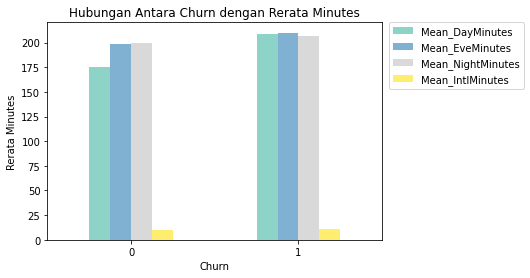

In [54]:
total_minutes1.plot(x='Churn', y=['Mean_DayMinutes','Mean_EveMinutes','Mean_NightMinutes','Mean_IntlMinutes'], kind='bar', colormap = 'Set3')
plt.title(f'Hubungan Antara Churn dengan Rerata Minutes',fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0)
plt.ylabel('Rerata Minutes')

- Pelanggan yang memiliki rerata total minutes pada pagi, sore, dan malam hari tertinggi memiliki kecenderungan untuk churrn

In [58]:
def total(i):
    b = (df_baru
           .groupby(i)
           .agg(Total_Charge =('Total Charge','mean'),
               Total_Minutes=('Total Minutes','mean'),
               Total_Calls=('Total Calls','mean'))
           .reset_index()
          )
    return b

In [59]:
total1 = total('Churn')
total1

,Churn,Total_Charge,Total_Minutes,Total_Calls
0,0,58.457840,583.897727,304.448521
1,1,65.532174,635.919231,303.745819


Text(0, 0.5, 'Rerata')

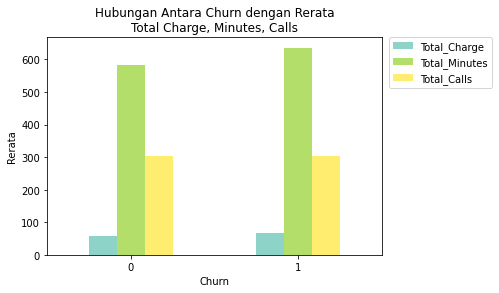

In [60]:
total1.plot(x='Churn', y=['Total_Charge','Total_Minutes','Total_Calls'], kind='bar', colormap = 'Set3')
plt.title(f'Hubungan Antara Churn dengan Rerata\nTotal Charge, Minutes, Calls',fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0)
plt.ylabel('Rerata')

- Pelanggan yang memiliki rerata total charge dan total minutes terrbesar memiliki kecenderungan untuk churn. Perbedaan paling signifikan adalah pada rerata total minutes

## 3. Data Preprocessing

In [64]:
df_baru

,State,Account Lenght,Area Code,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Eve Minutes,...,Total Intl Charge,Number Customer Service Calls,Churn,Total Charge,Total Minutes,Total Calls,Account Lenght New,Total Charge Baru,Total Calls Baru,Total Minutes Baru
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,3.70,1,0,59.24,625.2,332,100-150,40-60,300-400,600-700
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,3.29,0,0,62.29,539.4,333,100-150,60-80,300-400,500-600
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,1.78,2,0,66.80,564.8,255,50-100,60-80,200-300,500-600
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,2.73,3,0,52.09,512.0,359,50-100,40-60,300-400,500-600
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,2.03,3,0,78.31,786.8,321,100-150,60-80,300-400,>800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,...,2.78,0,0,65.13,656.1,243,50-100,60-80,200-300,600-700
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,...,3.11,3,0,52.88,506.8,266,50-100,40-60,200-300,500-600
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,...,1.86,1,0,53.10,499.8,338,50-100,40-60,300-400,400-500
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,...,2.67,2,0,75.09,766.1,374,0-50,60-80,300-400,>800


In [65]:
#Mendrop kolom yang digunakan untuk visualisasi
df_baru.drop('Total Charge', axis = 'columns', inplace = True)
df_baru.drop('Total Minutes', axis = 'columns', inplace = True)
df_baru.drop('Total Calls', axis = 'columns', inplace = True)
df_baru.drop('Account Lenght New', axis = 'columns', inplace = True)
df_baru.drop('Total Charge Baru', axis = 'columns', inplace = True)
df_baru.drop('Total Calls Baru', axis = 'columns', inplace = True)
df_baru.drop('Total Minutes Baru', axis = 'columns', inplace = True)

In [66]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          4250 non-null   object 
 1   Account Lenght                 4250 non-null   int64  
 2   Area Code                      4250 non-null   object 
 3   International Plan             4250 non-null   object 
 4   Voice Mail Plan                4250 non-null   object 
 5   Number Vmail Messages          4250 non-null   int64  
 6   Total Day Minutes              4250 non-null   float64
 7   Total Day Calls                4250 non-null   int64  
 8   Total Day Charge               4250 non-null   float64
 9   Total Eve Minutes              4250 non-null   float64
 10  Total Eve Calls                4250 non-null   int64  
 11  Total Eve Charge               4250 non-null   float64
 12  Total Night Minutes            4250 non-null   f

In [67]:
df_baru1 = df_baru.copy()

In [68]:
# drop minutes column
df_baru1.drop('Total Day Minutes', axis = 'columns', inplace = True)
df_baru1.drop('Total Eve Minutes', axis = 'columns', inplace = True)
df_baru1.drop('Total Night Minutes', axis = 'columns', inplace = True)
df_baru1.drop('Total Intl Minutes', axis = 'columns', inplace = True)

### 3.1 Handling Outlier

In [69]:
df_new2 = df_baru1.copy()

In [70]:
outlier = ['Account Lenght', 'Number Vmail Messages', 'Total Day Calls', 'Total Day Charge', 'Total Eve Calls', 'Total Eve Charge', 'Total Night Calls', 'Total Night Charge', 'Total Intl Calls', 'Total Intl Charge', 'Number Customer Service Calls']
print(f'Jumlah baris sebelum memfilter outlier: {len(df_new2)}')

filtered_entries = np.array([True] * len(df_new2))
for col in outlier:
    Q1 = df_new2[col].quantile(0.25)
    Q3 = df_new2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_new2[col] >= low_limit) & (df_new2[col] <= high_limit)) & filtered_entries
    
df_new2 = df_new2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_new2)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


In [71]:
df_new2

,State,Account Lenght,Area Code,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Calls,Total Day Charge,Total Eve Calls,Total Eve Charge,Total Night Calls,Total Night Charge,Total Intl Calls,Total Intl Charge,Number Customer Service Calls,Churn
0,OH,107,area_code_415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OK,75,area_code_415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
5,MO,147,area_code_415,yes,no,0,79,26.69,94,8.76,96,9.53,6,1.92,0,0
7,WV,141,area_code_415,yes,yes,37,84,43.96,111,18.87,97,14.69,5,3.02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,140,area_code_510,no,no,0,115,41.60,101,21.98,112,10.41,6,2.03,1,1
4245,MT,83,area_code_415,no,no,0,70,32.01,88,20.72,79,9.62,6,2.78,0,0
4246,WV,73,area_code_408,no,no,0,89,30.24,82,11.15,89,8.38,6,3.11,3,0
4247,NC,75,area_code_408,no,no,0,101,29.02,126,16.41,104,5.81,7,1.86,1,0


### 3.2 Encoding Data Train

In [72]:
#One hot encoding
df_new2 = pd.get_dummies(df_new2, columns = ['Area Code'])

In [73]:
#Encoding for binary column
df_new2['International Plan']= df_new2['International Plan'].replace(['no' ,'yes'],[0,1])
df_new2['Voice Mail Plan']= df_new2['Voice Mail Plan'].replace(['no' ,'yes'],[0,1])

In [74]:
df_new2

,State,Account Lenght,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Calls,Total Day Charge,Total Eve Calls,Total Eve Charge,Total Night Calls,Total Night Charge,Total Intl Calls,Total Intl Charge,Number Customer Service Calls,Churn,Area Code_area_code_408,Area Code_area_code_415,Area Code_area_code_510
0,OH,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0,1,0
1,NJ,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,1,0
3,OK,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0,1,0
5,MO,147,1,0,0,79,26.69,94,8.76,96,9.53,6,1.92,0,0,0,1,0
7,WV,141,1,1,37,84,43.96,111,18.87,97,14.69,5,3.02,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,140,0,0,0,115,41.60,101,21.98,112,10.41,6,2.03,1,1,0,0,1
4245,MT,83,0,0,0,70,32.01,88,20.72,79,9.62,6,2.78,0,0,0,1,0
4246,WV,73,0,0,0,89,30.24,82,11.15,89,8.38,6,3.11,3,0,1,0,0
4247,NC,75,0,0,0,101,29.02,126,16.41,104,5.81,7,1.86,1,0,1,0,0


In [75]:
#Frequency encoding untuk kolom State
freq = df_new2.groupby('State').size()

In [76]:
freq_dis = df_new2.groupby('State').size()/len(df_new2)

In [77]:
df_new2['State_frec_enc'] = df_new2.State.map(freq_dis)

In [78]:
df_new2.drop('State', axis = 1, inplace = True)

In [79]:
df_new2.describe()

,Account Lenght,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Calls,Total Day Charge,Total Eve Calls,Total Eve Charge,Total Night Calls,Total Night Charge,Total Intl Calls,Total Intl Charge,Number Customer Service Calls,Churn,Area Code_area_code_408,Area Code_area_code_415,Area Code_area_code_510,State_frec_enc
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,99.566145,0.091038,0.248933,6.939687,99.818208,30.614370,100.026743,17.036327,99.891038,9.038808,4.257468,2.783898,1.303556,0.104694,0.253485,0.496728,0.249787,0.020268
std,39.130022,0.287705,0.432457,12.534587,19.295141,8.948063,19.438500,4.159313,19.398227,2.186334,2.074590,0.692227,0.975672,0.306203,0.435068,0.500060,0.432951,0.003732
min,1.000000,0.000000,0.000000,0.000000,48.000000,5.870000,47.000000,5.470000,46.000000,3.050000,1.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009104
25%,73.000000,0.000000,0.000000,0.000000,87.000000,24.410000,87.000000,14.185000,87.000000,7.540000,3.000000,2.320000,1.000000,0.000000,0.000000,0.000000,0.000000,0.017639
50%,99.000000,0.000000,0.000000,0.000000,100.000000,30.630000,100.000000,17.080000,100.000000,9.050000,4.000000,2.810000,1.000000,0.000000,0.000000,0.000000,0.000000,0.019630
75%,127.000000,0.000000,0.000000,0.000000,113.000000,36.720000,113.000000,19.860000,113.000000,10.580000,5.000000,3.240000,2.000000,0.000000,1.000000,1.000000,0.000000,0.022191
max,204.000000,1.000000,1.000000,40.000000,152.000000,55.320000,154.000000,28.480000,153.000000,15.010000,10.000000,4.640000,3.000000,1.000000,1.000000,1.000000,1.000000,0.032148


In [80]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 0 to 4248
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Account Lenght                 3515 non-null   int64  
 1   International Plan             3515 non-null   int64  
 2   Voice Mail Plan                3515 non-null   int64  
 3   Number Vmail Messages          3515 non-null   int64  
 4   Total Day Calls                3515 non-null   int64  
 5   Total Day Charge               3515 non-null   float64
 6   Total Eve Calls                3515 non-null   int64  
 7   Total Eve Charge               3515 non-null   float64
 8   Total Night Calls              3515 non-null   int64  
 9   Total Night Charge             3515 non-null   float64
 10  Total Intl Calls               3515 non-null   int64  
 11  Total Intl Charge              3515 non-null   float64
 12  Number Customer Service Calls  3515 non-null   i

In [81]:
df_new2.head()

,Account Lenght,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Calls,Total Day Charge,Total Eve Calls,Total Eve Charge,Total Night Calls,Total Night Charge,Total Intl Calls,Total Intl Charge,Number Customer Service Calls,Churn,Area Code_area_code_408,Area Code_area_code_415,Area Code_area_code_510,State_frec_enc
0,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0,1,0,0.022475
1,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,1,0,0.022760
3,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0,1,0,0.017923
5,147,1,0,0,79,26.69,94,8.76,96,9.53,6,1.92,0,0,0,1,0,0.017639
7,141,1,1,37,84,43.96,111,18.87,97,14.69,5,3.02,0,0,0,1,0,0.032148


### 3.3 Normalization & Standardization

In [82]:
numerical5 = ['Number Vmail Messages', 'Total Intl Calls', 'Number Customer Service Calls', 'Account Lenght', 'Total Day Calls', 'Total Day Charge', 'Total Eve Calls', 'Total Eve Charge', 'Total Night Calls', 'Total Night Charge', 'Total Intl Charge']


In [83]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 0 to 4248
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Account Lenght                 3515 non-null   int64  
 1   International Plan             3515 non-null   int64  
 2   Voice Mail Plan                3515 non-null   int64  
 3   Number Vmail Messages          3515 non-null   int64  
 4   Total Day Calls                3515 non-null   int64  
 5   Total Day Charge               3515 non-null   float64
 6   Total Eve Calls                3515 non-null   int64  
 7   Total Eve Charge               3515 non-null   float64
 8   Total Night Calls              3515 non-null   int64  
 9   Total Night Charge             3515 non-null   float64
 10  Total Intl Calls               3515 non-null   int64  
 11  Total Intl Charge              3515 non-null   float64
 12  Number Customer Service Calls  3515 non-null   i

In [84]:
#Normalization
df_new2['Account Lenght'] = MinMaxScaler().fit_transform(df_new2['Account Lenght'].values.reshape(len(df_new2), 1))
df_new2['Total Day Calls'] = MinMaxScaler().fit_transform(df_new2['Total Day Calls'].values.reshape(len(df_new2), 1))
df_new2['Total Day Charge'] = MinMaxScaler().fit_transform(df_new2['Total Day Charge'].values.reshape(len(df_new2), 1))
df_new2['Total Eve Calls'] = MinMaxScaler().fit_transform(df_new2['Total Eve Calls'].values.reshape(len(df_new2), 1))
df_new2['Total Eve Charge'] = MinMaxScaler().fit_transform(df_new2['Total Eve Charge'].values.reshape(len(df_new2), 1))
df_new2['Total Night Calls'] = MinMaxScaler().fit_transform(df_new2['Total Night Calls'].values.reshape(len(df_new2), 1))
df_new2['Total Night Charge'] = MinMaxScaler().fit_transform(df_new2['Total Night Charge'].values.reshape(len(df_new2), 1))
df_new2['Total Intl Charge'] = MinMaxScaler().fit_transform(df_new2['Total Intl Charge'].values.reshape(len(df_new2), 1))

In [85]:
#Standardization
df_new2['Number Vmail Messages'] = StandardScaler().fit_transform(df_new2['Number Vmail Messages'].values.reshape(len(df_new2), 1))
df_new2['Total Intl Calls'] = StandardScaler().fit_transform(df_new2['Total Intl Calls'].values.reshape(len(df_new2), 1))
df_new2['Number Customer Service Calls'] = StandardScaler().fit_transform(df_new2['Number Customer Service Calls'].values.reshape(len(df_new2), 1))

In [86]:
df_new2.describe()

,Account Lenght,International Plan,Voice Mail Plan,Number Vmail Messages,Total Day Calls,Total Day Charge,Total Eve Calls,Total Eve Charge,Total Night Calls,Total Night Charge,Total Intl Calls,Total Intl Charge,Number Customer Service Calls,Churn,Area Code_area_code_408,Area Code_area_code_415,Area Code_area_code_510,State_frec_enc
count,3515.000000,3515.000000,3515.000000,3.515000e+03,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3.515000e+03,3515.000000,3.515000e+03,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,0.485548,0.091038,0.248933,-4.447209e-17,0.498252,0.500392,0.495577,0.502665,0.503655,0.500736,1.384699e-16,0.505039,-8.894418e-17,0.104694,0.253485,0.496728,0.249787,0.020268
std,0.192759,0.287705,0.432457,1.000142e+00,0.185530,0.180952,0.181668,0.180761,0.181292,0.182804,1.000142e+00,0.184594,1.000142e+00,0.306203,0.435068,0.500060,0.432951,0.003732
min,0.000000,0.000000,0.000000,-5.537218e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.570398e+00,0.000000,-1.336249e+00,0.000000,0.000000,0.000000,0.000000,0.009104
25%,0.354680,0.000000,0.000000,-5.537218e-01,0.375000,0.374924,0.373832,0.378748,0.383178,0.375418,-6.062146e-01,0.381333,-3.111694e-01,0.000000,0.000000,0.000000,0.000000,0.017639
50%,0.482759,0.000000,0.000000,-5.537218e-01,0.500000,0.500708,0.495327,0.504563,0.504673,0.501672,-1.241231e-01,0.512000,-3.111694e-01,0.000000,0.000000,0.000000,0.000000,0.019630
75%,0.620690,0.000000,0.000000,-5.537218e-01,0.625000,0.623862,0.616822,0.625380,0.626168,0.629599,3.579684e-01,0.626667,7.139106e-01,0.000000,1.000000,1.000000,0.000000,0.022191
max,1.000000,1.000000,1.000000,2.637902e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.768426e+00,1.000000,1.738991e+00,1.000000,1.000000,1.000000,1.000000,0.032148


## 4. Machine Learning Model

- Positive = Pelanggan yang Churn
- Negative = Pelanggan yang tidak Churn
- False Negative = Pelanggan yang Churn tetapi diprediksi tidak Churn
- False Positive = Pelanggan yang tidak Churn tetapi diprediksi Churn
- Fokus = Tujuan kita adalah memprediksi customer churn untuk diberikan pelayanan agar bisa tetap loyal sehingga perlu meminimalisir false negative. hal ini dikarenakan jika pelanggan yang churn di prediksi tidak churn maka provider tidak tahu bahwa seharusnya pelanggan tersebut diberi teratment/ pelayanan agar tidak churn.

In [87]:
# split train test

X = df_new2.drop(columns='Churn')
y = df_new2[['Churn']]

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.20, random_state=42)

In [88]:
y.value_counts()

Churn
0        3147
1         368
dtype: int64

- Terjadi Imbalance Data sehingga perlu menggunakan hyperparameter tuning

In [89]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    print('-----')
    print('ROC AUC')
    
    
    print('Area under Curve of the ROC:', roc_auc_score(y_test_data,
                                                        model.predict_proba(X_test_data)[:,1]))

### 4.1. Logistic Regression

In [90]:
logreg = LogisticRegression()
logreg.fit(X_train_data, y_train_data)

LogisticRegression()

- Karena data mengalami imbalance, sehingga perlu dilakukan hyperparameter tuning

#### 5.1.1 Hyperparameter Tuning

In [91]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 15.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [92]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)
#Membuat Object Logistic Regression
logreg = LogisticRegression()
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logreg, hyperparameters, cv=10)
#Fitting Model
best_model = clf.fit(X_train_data, y_train_data)
#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 206.913808111479


In [93]:
logreg_final = LogisticRegression(penalty='l2', C=206.913808111479)
logreg_final.fit(X_train_data, y_train_data)

LogisticRegression(C=206.913808111479)

In [94]:
evaluate(logreg_final, X_test_data, y_test_data)

Accuracy: 0.9260312944523471
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       633
           1       0.71      0.43      0.54        70

    accuracy                           0.93       703
   macro avg       0.83      0.70      0.75       703
weighted avg       0.92      0.93      0.92       703

------
Assuming 1 as positive, we get:

True Positive: 30
True Negative: 621
False Positive: 12
False Negative: 40

Precision: 0.7142857142857143
Recall: 0.42857142857142855
F1-Score: 0.5357142857142858
-----
ROC AUC
Area under Curve of the ROC: 0.850191830286617


- Didapatkan accuracy setelah dilakukan hyperparameter tuning untuk train data = 91,5% dan test data = 92,6%

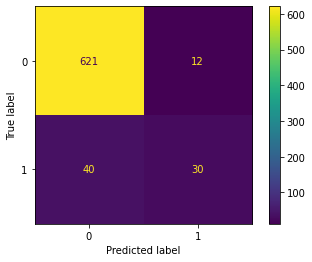

In [95]:
plot_confusion_matrix(logreg_final, X_test_data, y_test_data)

### 4.2 Decision Tree

In [96]:
dt = DecisionTreeClassifier()
dt.fit(X_train_data, y_train_data)

DecisionTreeClassifier()

#### 4.2.1 Hyperparemeter Tuning Decision Tree

In [97]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[3,5,7,9,11,'max']}

In [98]:
grid = GridSearchCV(
             estimator=dt,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [99]:
grid.fit(X_train_data, y_train_data)
grid.best_params_

{'max_depth': 5}

In [100]:
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_train_data, y_train_data)

DecisionTreeClassifier(max_depth=5)

In [101]:
evaluate(dt1, X_test_data, y_test_data)

Accuracy: 0.9487908961593172
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       633
           1       0.85      0.59      0.69        70

    accuracy                           0.95       703
   macro avg       0.90      0.79      0.83       703
weighted avg       0.95      0.95      0.94       703

------
Assuming 1 as positive, we get:

True Positive: 41
True Negative: 626
False Positive: 7
False Negative: 29

Precision: 0.8541666666666666
Recall: 0.5857142857142857
F1-Score: 0.6949152542372882
-----
ROC AUC
Area under Curve of the ROC: 0.8500451365380275


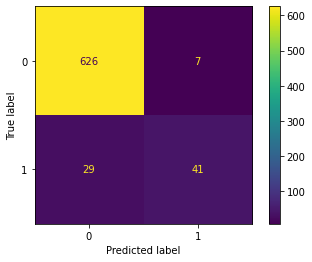

In [102]:
plot_confusion_matrix(dt1, X_test_data, y_test_data)

### 4.3 K-Nearest Neighbor

In [103]:
knn = KNeighborsClassifier()
knn.fit(X_train_data, y_train_data)

KNeighborsClassifier()

### 4.3.1 Hyperparameter KNN

In [104]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier() 

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_data, y_train_data)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [105]:
print(grid_search.best_params_)

{'n_neighbors': 2}


In [106]:
knn_final = KNeighborsClassifier(n_neighbors=2)
knn_final.fit(X_train_data, y_train_data)

KNeighborsClassifier(n_neighbors=2)

In [107]:
evaluate(knn_final,X_test_data, y_test_data)

Accuracy: 0.9132290184921764
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       633
           1       0.80      0.17      0.28        70

    accuracy                           0.91       703
   macro avg       0.86      0.58      0.62       703
weighted avg       0.90      0.91      0.89       703

------
Assuming 1 as positive, we get:

True Positive: 12
True Negative: 630
False Positive: 3
False Negative: 58

Precision: 0.8
Recall: 0.17142857142857143
F1-Score: 0.2823529411764706
-----
ROC AUC
Area under Curve of the ROC: 0.6467840216655382


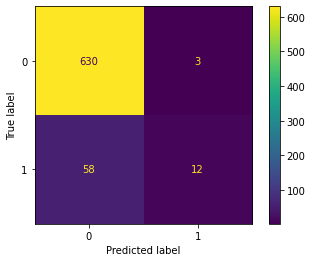

In [108]:
plot_confusion_matrix(knn_final,X_test_data, y_test_data)

### 4.4 Random Forest

### 4.4.1 Random Forest Biasa

In [109]:
base = RandomForestClassifier()
base.fit(X_train_data, y_train_data)

RandomForestClassifier()

In [110]:
evaluate(base)

Accuracy: 0.9615931721194879
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       633
           1       1.00      0.61      0.76        70

    accuracy                           0.96       703
   macro avg       0.98      0.81      0.87       703
weighted avg       0.96      0.96      0.96       703

------
Assuming 1 as positive, we get:

True Positive: 43
True Negative: 633
False Positive: 0
False Negative: 27

Precision: 1.0
Recall: 0.6142857142857143
F1-Score: 0.7610619469026549
-----
ROC AUC
Area under Curve of the ROC: 0.8659106296547054


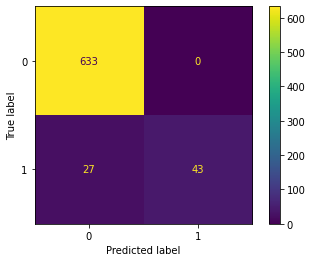

In [111]:
plot_confusion_matrix(base,X_test_data, y_test_data)

### 4.4.2 Random forest Undersampling

In [112]:
print("Sebelum di-undersample", Counter(y_train_data['Churn']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

print("Setelah di-undersample", Counter(y_train_under['Churn']))

Sebelum di-undersample Counter({0: 2514, 1: 298})
Setelah di-undersample Counter({0: 298, 1: 298})


In [113]:
model_u = RandomForestClassifier(random_state = 1)
model_u.fit(x_train_under, y_train_under)
evaluate(model_u, X_test_data, y_test_data)

Accuracy: 0.8847795163584637
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       633
           1       0.45      0.76      0.57        70

    accuracy                           0.88       703
   macro avg       0.71      0.83      0.75       703
weighted avg       0.92      0.88      0.90       703

------
Assuming 1 as positive, we get:

True Positive: 53
True Negative: 569
False Positive: 64
False Negative: 17

Precision: 0.452991452991453
Recall: 0.7571428571428571
F1-Score: 0.5668449197860963
-----
ROC AUC
Area under Curve of the ROC: 0.846231099074701


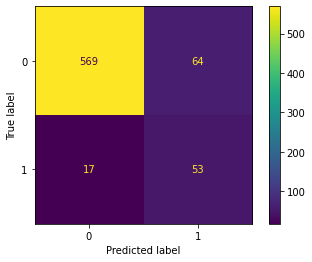

In [114]:
plot_confusion_matrix(model_u, X_test_data, y_test_data)

### 4.4.3 Random forest oversampling

In [115]:
print("Sebelum di-undersample", Counter(y_train_data['Churn']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_data, y_train_data)

print("Sesudah di-undersample", Counter(y_train_SMOTE['Churn']))

Sebelum di-undersample Counter({0: 2514, 1: 298})
Sesudah di-undersample Counter({0: 2514, 1: 2514})


In [116]:
model_o = RandomForestClassifier(random_state = 1, n_jobs = -1)
model_o.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(model_o, X_test_data, y_test_data)

Accuracy: 0.9416785206258891
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       633
           1       0.74      0.64      0.69        70

    accuracy                           0.94       703
   macro avg       0.85      0.81      0.83       703
weighted avg       0.94      0.94      0.94       703

------
Assuming 1 as positive, we get:

True Positive: 45
True Negative: 617
False Positive: 16
False Negative: 25

Precision: 0.7377049180327869
Recall: 0.6428571428571429
F1-Score: 0.6870229007633588
-----
ROC AUC
Area under Curve of the ROC: 0.8798578199052133


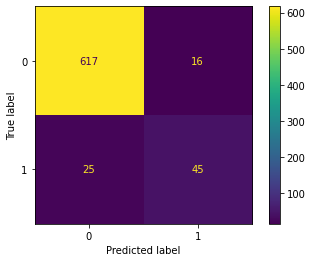

In [117]:
plot_confusion_matrix(model_o, X_test_data, y_test_data)

### 4.4.4 Random Forest Combining Oversamplind & Undersampling

In [118]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Combined Model
# define pipeline
combined_model = RandomForestClassifier(n_jobs = -1)
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(X_train_data, y_train_data)
evaluate(pipeline, X_test_data, y_test_data)

Accuracy: 0.9445234708392604
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       633
           1       0.73      0.70      0.72        70

    accuracy                           0.94       703
   macro avg       0.85      0.84      0.84       703
weighted avg       0.94      0.94      0.94       703

------
Assuming 1 as positive, we get:

True Positive: 49
True Negative: 615
False Positive: 18
False Negative: 21

Precision: 0.7313432835820896
Recall: 0.7
F1-Score: 0.7153284671532848
-----
ROC AUC
Area under Curve of the ROC: 0.8735499887158655


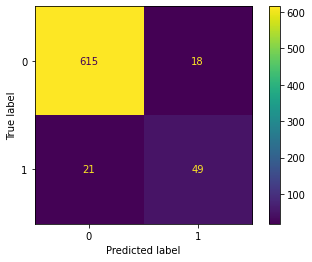

In [119]:
plot_confusion_matrix(pipeline, X_test_data, y_test_data)

### Kesimpulan Model

- Dikarenakan fokus nya adalah meminimalisir false negative maka dilihat recall yang terbesar
- Berdasarkan modelling yang telah dilakukan dengan berbagai algorithma, dapat dikatakan bahwa model memiliki nilai recall yang tidak begitu baik ketika digunakan model yang sederhana (logistic, KNN, dan Decision Tree) sehingga bisa dikatakan bahwa model mengalami overfitting. 
- Setelah digunakan model yang lebih kompleks yaitu random forest, didapatkan bahwa model yang paling optimal adalah model random forest oversampling yang memiliki performa terbaik dengan score recall sebesar 71% dan accuracy sebesar 95%


## Feature Importance

In [ ]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=f48d32e8b388e2b5c88378b85b9e3c83136cb0823b9da89fa8270f1ba24380c2
  Stored in directory: /root/.cache/pip/wheels/76/31/8c/c78df586df31b3f3e0c4ecc759ee73e175545cff5548201996
Successfully built dalex


In [ ]:
import dalex as dx

In [ ]:
ranfor_imp = dx.Explainer(model_o, X_train_data, y_train_data, label = 'Random Forest Oversampling Interpretation')

Preparation of a new explainer is initiated

  -> data              : 2812 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 2812 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Oversampling Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ff9d048ba70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.151, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.43, mean = -0.0452, max = 0.33
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
ranfor_imp.model_parts().plot()

- Dari feature importance di atas dapat disimpulkan bahwa ada 10 fitur yang mempengaruhi kecenderungan churn. Fitur yang paling berpengaruh adalah total day charge, international plan dan total evening call. 
- Hal itu dapat dilihat berdasarkan deep dive question yang telah dilakukan bahwa semakin tinggi total day charge maka pelanggan memiliki kecenderungan untuk churn. Selain itu karena semakin tinggi total charge maka lama nya pelanggan menggunakan telepon (Total minutes) juga semakin tinggi dan berpengaruh terhadap pembiayaan

## Rekomendasi

- Semakin lamanya waktu telepon dan banyaknya telepon, akan mempengaruhi total charge. dan semakin tinggi total charge maka semakin tinggi pula kecenderungan pelanggan untuk churn. Hal ini perlu diatasi dengan melakukan evaluasi terhadap pembiayaan telepon terrutama di pagi hari karena charge dan lama waktu tellepon terbesar ada di pagi hari. Bisa juga dilakukan dengan memberikan beberapa promo untuk memperkecil pembiayaan 
- Meningkatkan layanan pada voice mail plan dan international plan
- Memperbaiki layanan di kode area 415 karena memiliki pelanggan terbanyak di daerah tersebut
- Dapat dikatakan bahwa telco provider memiliki pelayanan yang cukup baik karena banyak yang memiliki kecennderungan tidak churn dan penelepon customer service hanya menelepon sekitar 0-3 kali saja